In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
#Read the dataset and print the top 5 elements of the dataset
data = pd.read_csv('D:/whole.csv')
data.head(5)

,Year,Value
0,1970,651
1,1971,471
2,1972,567
3,1973,473
4,1974,581


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    50 non-null     int64
 1   Value   50 non-null     int64
dtypes: int64(2)
memory usage: 928.0 bytes


In [5]:
X = data.loc[:,['Year']].values
y = data.loc[:,'Value'].values

In [6]:
data_dmatrix = xgb.DMatrix(X,label=y)
data_dmatrix

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40, 1)
(40,)
(10, 1)
(10,)


In [9]:
reg_mod = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=7,
    gamma=0,
)
reg_mod.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [10]:
#After training the model, we'll check the model training score.
scores = cross_val_score(reg_mod, X_train, y_train,cv=8)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.81


In [11]:
reg_mod.fit(X_train,y_train)

predictions = reg_mod.predict(X_test)

In [12]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 790.748791


In [13]:
from sklearn.metrics import r2_score
r2 = np.sqrt(abs(r2_score(y_test, predictions)))
print("R_Squared Score : %f" % (r2))

R_Squared Score : 0.988570


<AxesSubplot:xlabel='Year', ylabel='Value'>

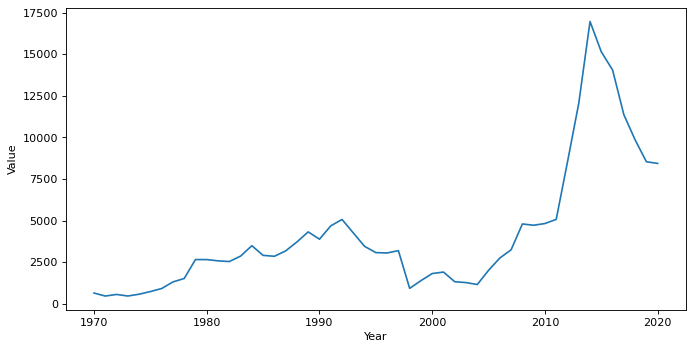

In [14]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='Year', y='Value', data=data)

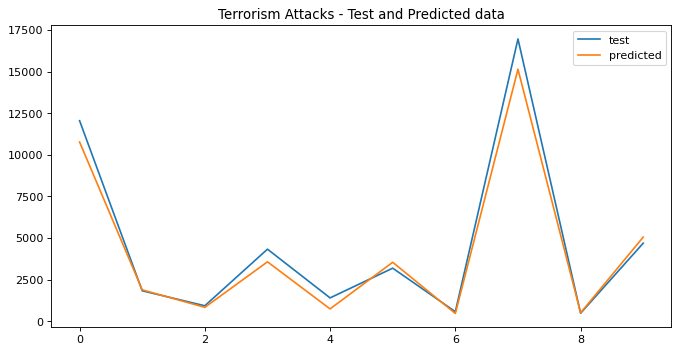

In [15]:
plt.figure(figsize=(10, 5), dpi=80)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="test")
plt.plot(x_ax, predictions, label="predicted")
plt.title("Terrorism Attacks - Test and Predicted data")
plt.legend()
plt.show()

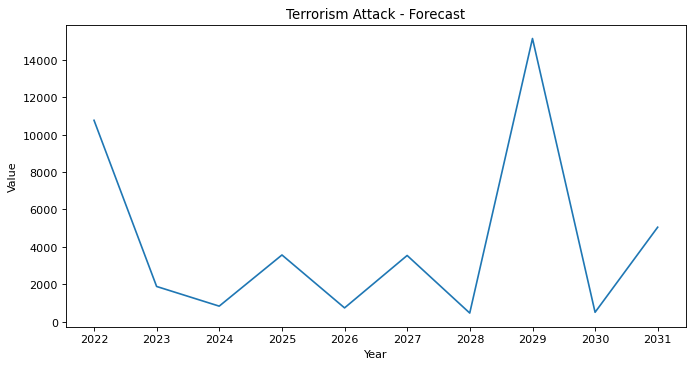

In [20]:
plt.figure(figsize=(10, 5), dpi=80)
df=pd.DataFrame(predictions, columns=['Value']) 
df['Year'] = pd.date_range(start='2021', periods= len(df), freq='Y')
sns.lineplot(x='Year', y='Value', data=df)
plt.title("Terrorism Attack - Forecast")
plt.show()

In [21]:
df

,Value,Year
0,10765.555664,2021-12-31
1,1880.205200,2022-12-31
2,828.144470,2023-12-31
3,3564.602295,2024-12-31
4,734.291382,2025-12-31
5,3537.562744,2026-12-31
6,458.700745,2027-12-31
7,15139.672852,2028-12-31
8,500.060120,2029-12-31
9,5048.534180,2030-12-31


In [33]:
data = data.append(df)

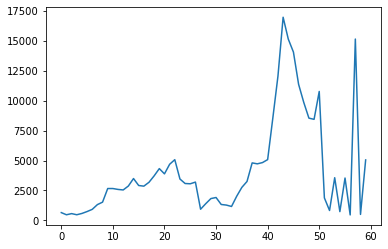

In [34]:
x = range(len(data["Year"]))
y = data["Value"]
plt.plot(x,y)

0       651
1       471
2       567
3       473
4       581
5       740
6       923
7      1319
8      1526
9      2662
10     2661
11     2586
12     2543
13     2870
14     3495
15     2914
16     2860
17     3183
18     3720
19     4324
20     3886
21     4685
22     5071
23     3456
24     3081
25     3058
26     3198
27      934
28     1396
29     1823
30     1912
31     1330
32     1280
33     1164
34     2017
35     2757
36     3250
37     4801
38     4723
39     4827
40     5075
41     8525
42    12047
43    16960
44    15138
45    14051
46    11364
47     9853
48     8537
49     8438
Name: Value, dtype: int64